In [ ]:
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4
from wd_setup import WhiteDwarf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
M_SOLAR = 6.95e33

In [ ]:
rhoc_scaled = 1e6
Ye = 1

wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

# Initial conditions
r = 1e-10  
state = np.array([rhoc_scaled, 0]) # [density, mass]
dr = 0.001

R_history = []
M_history = []
rho_history = []

while state[0] > 0 and r < 2.0:
    R_history.append(r)
    rho_history.append(state[0])
    M_history.append(state[1])
    
    state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
    
    r += dr

R_history = np.array(R_history)
M_history = np.array(M_history)
rho_history = np.array(rho_history)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 10/10 [00:00<00:00, 36.08it/s]


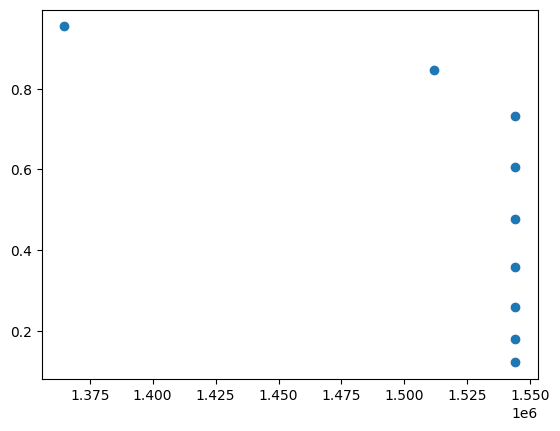

In [ ]:
M = []
R = []

rhoc_scaled = np.logspace(-1, 1, 10)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

    # Initial conditions
    r = 1e-10  
    state = np.array([rhoc, 0]) # [density, mass]

    while state[0] > 0 and r < 2.0:
        state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
        
        r += dr

    R.append(r)
    M.append(state[1])

R = np.array(R)
M = np.array(M)

plt.scatter(R * wd1.R0 / 1000, M * wd1.M0 / M_SOLAR)